<div style="text-align: center; font-weight: bold; font-size: 40px;">

EDA

</div>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

carga del archivo .xslx, especificando la hoja de "HECHOS"

In [73]:
# Cargar el archivo Excel
file_path = 'homicidios.xlsx'

# Leer la hoja 'HECHOS' en un DataFrame
df_siniestros = pd.read_excel(file_path, sheet_name='HECHOS')


In [74]:
df_siniestros.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


Comprobacion de duplicados y valores Nulos

In [75]:
duplicados = df_siniestros.duplicated()  
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


In [76]:
#Transformar los valores "SD" a nullos ya que refiere a que no hay detalle
df_siniestros = df_siniestros.apply(lambda col: col.map(lambda x: np.nan if x == "SD" else x))

In [77]:
df_siniestros.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         1
LUGAR_DEL_HECHO            1
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    9
ACUSADO                   23
dtype: int64

In [78]:
df_siniestros = df_siniestros.drop(['Altura', 'XY (CABA)', 'pos x', 'pos y', 'Cruce', "Dirección Normalizada"], axis= 1)

In [79]:
df_siniestros.isna().sum()

ID                  0
N_VICTIMAS          0
FECHA               0
AAAA                0
MM                  0
DD                  0
HORA                1
HH                  1
LUGAR_DEL_HECHO     1
TIPO_DE_CALLE       0
Calle               1
COMUNA              0
PARTICIPANTES       0
VICTIMA             9
ACUSADO            23
dtype: int64

In [80]:
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   AAAA             696 non-null    int64         
 4   MM               696 non-null    int64         
 5   DD               696 non-null    int64         
 6   HORA             695 non-null    object        
 7   HH               695 non-null    float64       
 8   LUGAR_DEL_HECHO  695 non-null    object        
 9   TIPO_DE_CALLE    696 non-null    object        
 10  Calle            695 non-null    object        
 11  COMUNA           696 non-null    int64         
 12  PARTICIPANTES    696 non-null    object        
 13  VICTIMA          687 non-null    object        
 14  ACUSADO          673 non-null    object   

In [81]:
df_siniestros.dropna(inplace=True)

In [82]:
df_siniestros['COMUNA'] = df_siniestros['COMUNA'].astype(int)

In [83]:
df_siniestros['FECHA'] = pd.to_datetime(df_siniestros['FECHA'], format='%m/%d/%Y')

In [84]:
comuna_cero = df_siniestros[df_siniestros['COMUNA'] == 0].shape[0]

print(f"El número de registros con COMUNA en 0 es: {comuna_cero}")

El número de registros con COMUNA en 0 es: 0


<div style="text-align: center; font-weight: bold; font-size: 40px;">

Graficacion del archivo HECHOS

</div>

<span style="font-weight:bold; font-size: 25px;">Graficacion de  tasa de Homicidios por semestre</span>

In [85]:
df_siniestros['FECHA'] = pd.to_datetime(df_siniestros['FECHA'])

# Definicion de los intervalos de tiempo para cada semestre
bins = pd.to_datetime([
    '2016-01-01', '2016-07-01', '2017-01-01', '2017-07-01', '2018-01-01', 
    '2018-07-01', '2019-01-01', '2019-07-01', '2020-01-01', '2020-07-01', 
    '2021-01-01', '2021-07-01', '2022-01-01'
])

# Definicion de las etiquetas para cada intervalo
labels = [
    '2016_S1', '2016_S2', '2017_S1', '2017_S2', '2018_S1', '2018_S2', 
    '2019_S1', '2019_S2', '2020_S1', '2020_S2', '2021_S1', '2021_S2'
]

df_siniestros['semestre'] = pd.cut(df_siniestros['FECHA'], bins=bins, labels=labels)


In [88]:
# Definicion de la población total
poblacion_total = 3121707.0

# Agrupar por la columna "semestre" y sumar los valores de "N_VICTIMAS"
suma_victimas_por_semestre = df_siniestros.groupby('semestre', observed=False)['N_VICTIMAS'].sum().reset_index()

# Calcular la tasa de homicidios por semestre
# La fórmula es: (Número de víctimas / Población total) * 100,000
suma_victimas_por_semestre['TASA_HOMICIDIOS'] = (suma_victimas_por_semestre['N_VICTIMAS'] / poblacion_total) * 100000
df_tasa_homicidios = suma_victimas_por_semestre
df_tasa_homicidios['TASA_HOMICIDIOS'] = df_tasa_homicidios['TASA_HOMICIDIOS'].round(2)
print(df_tasa_homicidios)

   semestre  N_VICTIMAS  TASA_HOMICIDIOS
0   2016_S1          59             1.89
1   2016_S2          72             2.31
2   2017_S1          65             2.08
3   2017_S2          69             2.21
4   2018_S1          70             2.24
5   2018_S2          76             2.43
6   2019_S1          54             1.73
7   2019_S2          46             1.47
8   2020_S1          31             0.99
9   2020_S2          50             1.60
10  2021_S1          54             1.73
11  2021_S2          42             1.35


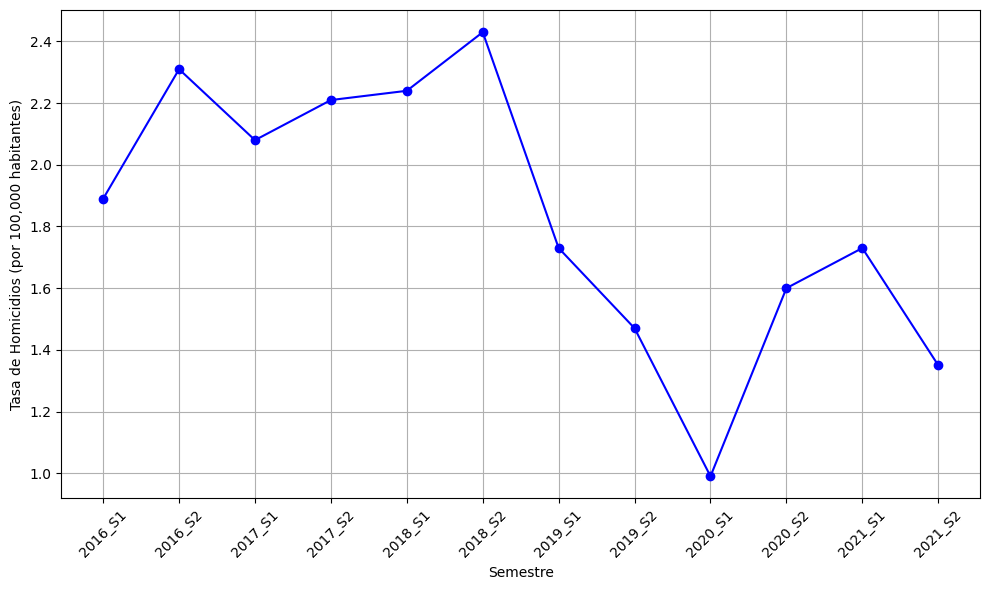

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(df_tasa_homicidios['semestre'], df_tasa_homicidios['TASA_HOMICIDIOS'], marker='o', linestyle='-', color='b')

plt.xlabel('Semestre')
plt.ylabel('Tasa de Homicidios (por 100,000 habitantes)')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el gráfico anterior, podemos observar que desde el primer semestre de 2016 hasta el último semestre de 2018, hubo un incremento en la tasa de homicidios, alcanzando su punto más alto con una tasa de 2.43 por cada 100,000 habitantes. Posteriormente, se observa una fuerte caída hasta el primer semestre de 2020, donde la tasa de homicidios alcanzó su punto más bajo, con 0.99 por cada 100,000 habitantes.

En el último conjunto de registros analizados, correspondiente al último semestre de 2021, la tasa de homicidios se situó en 1.34 por cada 100,000 habitantes. Aunque esta cifra es menos de la mitad del pico máximo registrado en 2018, sigue siendo más alta que la tasa más baja observada en 2020.

Este análisis muestra una tendencia fluctuante en la tasa de homicidios, destacando la necesidad de continuar implementando y evaluando políticas efectivas de prevención de la violencia para mantener la disminución de estos índices.

<span style="font-weight:bold; font-size: 25px;">Grafico de distribucion Homicidios Viales por Comuna</span>

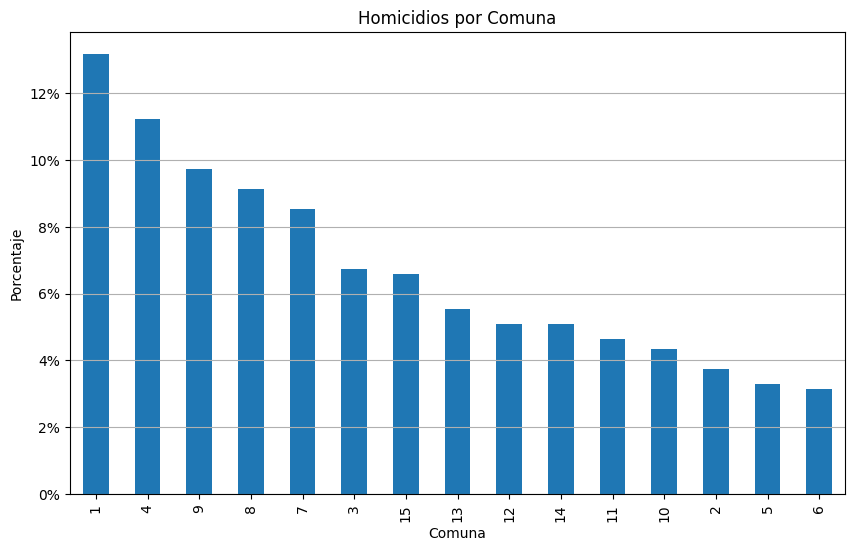

In [90]:
df_temp = df_siniestros.copy()
# Contamos la frecuencia de cada valor en la columna 'COMUNA' y la convertimos en porcentajes
comuna_counts = df_temp['COMUNA'].value_counts(normalize=True) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = comuna_counts.plot(kind='bar')

# Añadir el título y etiquetas de los ejes
plt.title('Homicidios por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Porcentaje')
plt.grid(axis='y')
# Formatear las etiquetas del eje Y como porcentajes
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Mostrar el gráfico
plt.show()

En el gráfico de "Homicidios por Comuna" de la Ciudad Autónoma de Buenos Aires, podemos observar una notable concentración de accidentes mortales de tránsito en las comunas 1, 4, 9, 8 y 7, las cuales acumulan aproximadamente el 50% del total de los homicidios viales.

Este patrón sugiere que en estas comunas hay factores específicos que contribuyen a la alta incidencia de accidentes mortales. Entre estos factores pueden estar la alta densidad de tráfico, infraestructura vial deficiente, y una mayor prevalencia de conductas de riesgo. La infraestructura vial y el tráfico intenso en zonas céntricas y comerciales, como la comuna 1, así como en áreas con mayores problemas de movilidad y seguridad vial, como las comunas 4, 9, 8 y 7, pueden ser determinantes.

Por otro lado, las comunas 5 y 6 reportan la menor mortalidad vial, lo que podría deberse a mejores condiciones de infraestructura, menor densidad de tráfico, o políticas de seguridad vial más efectivas.

Este análisis resalta la necesidad de enfoques específicos para mejorar la seguridad vial en las comunas más afectadas, como mejorar la infraestructura, aumentar la vigilancia y concientización, y aplicar políticas de tráfico más estrictas para reducir la incidencia de accidentes mortales.

<span style="font-weight:bold; font-size: 25px;">Grafico Cantidad de Accidentes por Periodo del Día</span>

In [91]:
df_siniestros['HH'] = df_siniestros['HH'].astype(int)

<Figure size 1000x600 with 0 Axes>

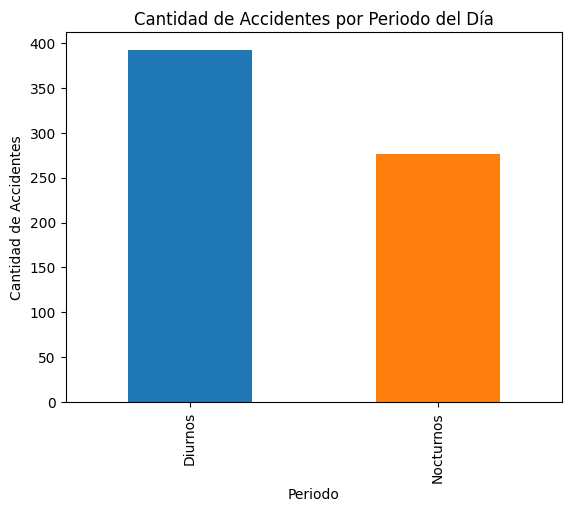

In [92]:
# Agregar la columna rango_horario
df_siniestros['rango_horario'] = df_siniestros['HH'].apply(lambda x: 'DIURNO' if 6 <= x < 19 else 'NOCTURNO')

# Filtrar los accidentes diurnos (6:00 a 18:00)
diurnos = df_siniestros[df_siniestros['rango_horario'] == 'DIURNO']

# Filtrar los accidentes nocturnos (19:00 a 5:00)
nocturnos = df_siniestros[df_siniestros['rango_horario'] == 'NOCTURNO']

cantidad_diurnos = len(diurnos)
cantidad_nocturnos = len(nocturnos)

data = {
    'Periodo': ['Diurnos', 'Nocturnos'],
    'Cantidad de Accidentes': [cantidad_diurnos, cantidad_nocturnos]
}

df_periodos = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e']  # Azul y Naranja
ax = df_periodos.plot(kind='bar', x='Periodo', y='Cantidad de Accidentes', legend=False, color=colors)
plt.title('Cantidad de Accidentes por Periodo del Día')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Accidentes')

# Mostrar el gráfico
plt.show()

El gráfico muestra que la mayoría de los homicidios viales ocurren durante el día, entre las 06:00 y las 18:00 horas, debido al mayor volumen de tráfico por actividades cotidianas. Aunque el tráfico nocturno es menor, los accidentes en este periodo suelen ser más graves por factores como la fatiga y la conducción bajo efectos del alcohol.

Es crucial implementar medidas de seguridad específicas tanto para el día, enfocadas en la gestión del tráfico y la infraestructura, como para la noche, enfocadas en reducir conductas de riesgo y mejorar la iluminación vial.

In [93]:
df_siniestros.to_csv('hechos.csv', index=False)

<div style="text-align: center; font-weight: bold; font-size: 40px;">

Graficacion del archivo VICTIMAS

</div>

In [54]:
# cargamos la hoja de Victimas
file_path = 'homicidios.xlsx'
df_victimas = pd.read_excel(file_path, sheet_name='VICTIMAS')

In [55]:
df_victimas.head(10)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
5,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
6,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
7,2016-0010,2016-01-29,2016,1,29,CONDUCTOR,MOTO,MASCULINO,18,2016-01-29 00:00:00
8,2016-0012,2016-02-08,2016,2,8,CONDUCTOR,MOTO,MASCULINO,22,2016-02-08 00:00:00
9,2016-0013,2016-02-10,2016,2,10,PEATON,PEATON,MASCULINO,16,2016-02-10 00:00:00


In [56]:
duplicados2 = df_victimas.duplicated()  
num_duplicados2 = duplicados2.sum()
print('Número de filas duplicadas:', num_duplicados2)

Número de filas duplicadas: 0


In [57]:
df_victimas = df_victimas.apply(lambda col: col.map(lambda x: np.nan if x == "SD" else x))

In [58]:
df_victimas.isna().sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

In [59]:
# Definir los rangos etarios
bins = [0, 18, 30, 50, 70, 100]
labels = ['0-18', '19-30', '31-50', '51-70', '71+']

# Crear una nueva columna en el DataFrame para los rangos etarios
df_victimas['Rango_Etario'] = pd.cut(df_victimas['EDAD'], bins=bins, labels=labels, right=False)

# Manejar los registros donde la edad es nula
df_victimas['Rango_Etario'] = df_victimas['Rango_Etario'].cat.add_categories('Sin detalle')
df_victimas['Rango_Etario'] = df_victimas['Rango_Etario'].fillna('Sin detalle')
df_victimas.to_excel("victimas.xlsx")


<span style="font-weight:bold; font-size: 25px;">Grafico Distribución de Registros por Rango Etario</span>

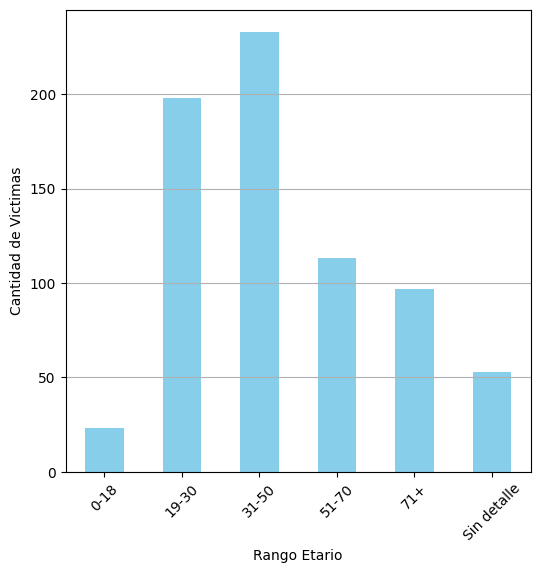

In [60]:

# Contar los registros por cada rango etario
edades_counts = df_victimas['Rango_Etario'].value_counts().sort_index()
# Crear el gráfico
plt.figure(figsize=(6, 6))
edades_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Victimas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

El análisis del gráfico revela que la mayoría de los fallecidos en accidentes viales tienen entre 19 y 50 años, lo que indica una alta vulnerabilidad en este grupo.

Los siguientes grupos más afectados son las victimas de entre 51 a 70 años, seguidos por los mayores de 71 años. El grupo menos frecuente en términos de fallecimientos es el de 0 a 18 años.

Este patrón sugiere la necesidad de enfoques de seguridad vial específicos para cada grupo etario, con un énfasis particular en los adultos jóvenes y de mediana edad para reducir la mortalidad en accidentes viales.

<span style="font-weight:bold; font-size: 25px;">Distribución de Registros por Tipo de Vehículo y Rol</span>

In [61]:

# Manejar los registros donde el tipo de vehículo es nulo
df_victimas['VICTIMA'] = df_victimas['VICTIMA'].fillna('Sin detalle')

# Manejar los registros donde el rol es nulo
df_victimas['ROL'] = df_victimas['ROL'].fillna('Sin detalle')

# Crear una tabla pivot para los datos, agrupando por tipo de vehículo y rol
pivot_table = df_victimas.pivot_table(index='VICTIMA', columns='ROL', aggfunc='size', fill_value=0, observed=False)

# Calcular el total de fallecidos
total_fallecidos = pivot_table.sum().sum()

# Agregar una columna con el total por tipo de vehículo
pivot_table['Total'] = pivot_table.sum(axis=1)

# Calcular el porcentaje respecto al total
pivot_table['Porcentaje'] = (pivot_table['Total'] / total_fallecidos) * 100

# Ordenar los tipos de vehículos por la suma total de registros, de mayor a menor
pivot_table = pivot_table.sort_values(by='Total', ascending=False)

# Mostrar el DataFrame resultante
pivot_table.head()


ROL,CICLISTA,CONDUCTOR,PASAJERO_ACOMPAÑANTE,PEATON,Sin detalle,Total,Porcentaje
VICTIMA,,,,,,,
MOTO,0,261,39,0,3,303,42.259414
PEATON,0,0,0,267,0,267,37.238494
AUTO,0,65,29,0,0,94,13.110181
BICICLETA,29,0,0,0,0,29,4.044630
Sin detalle,0,0,1,0,8,9,1.255230


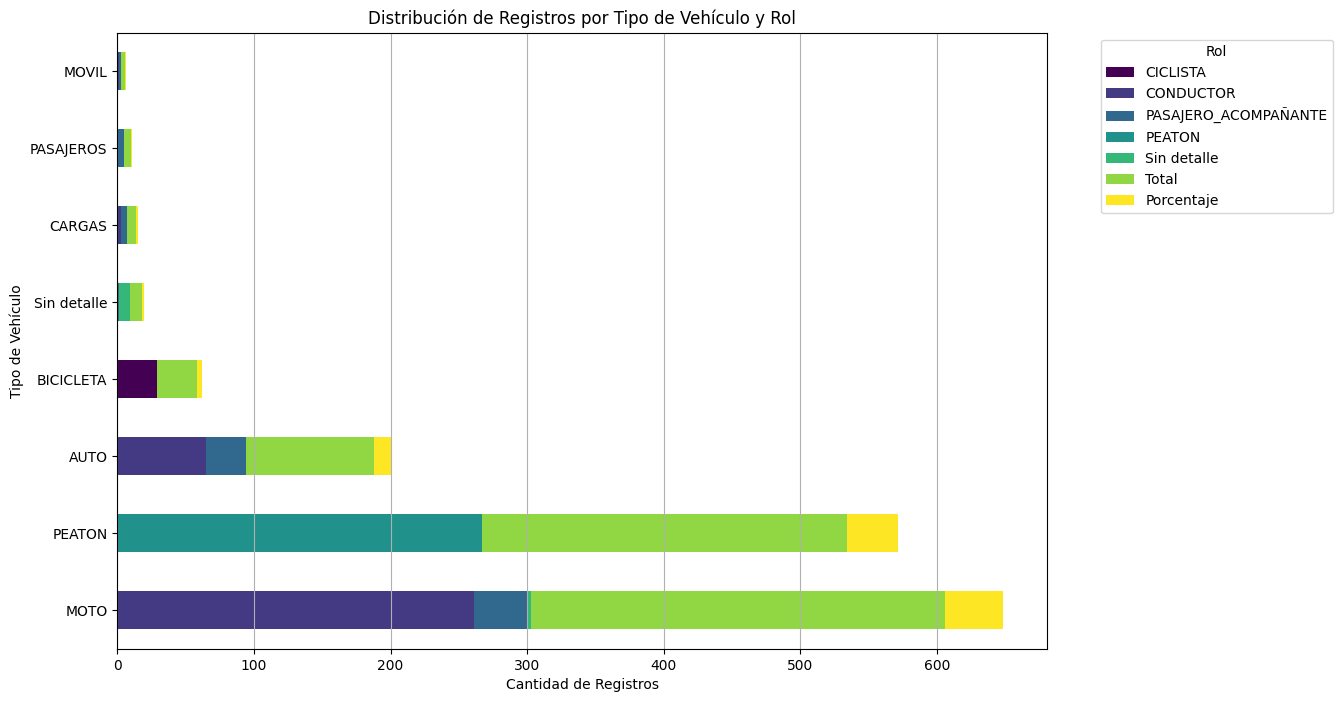

In [62]:

# Ordenar los tipos de vehículos por la suma total de registros, de mayor a menor
pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

# Crear el gráfico
pivot_table.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Distribución de Registros por Tipo de Vehículo y Rol')
plt.xlabel('Cantidad de Registros')
plt.ylabel('Tipo de Vehículo')
plt.legend(title='Rol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()

El gráfico anterior no solo ilustra la frecuencia de los homicidios viales según el tipo de transporte utilizado, ya sea transporte de pasajeros, caminando o en motocicleta, sino que también destaca el rol de las víctimas dentro del vehículo.

Podemos observar que la gran mayoría de los homicidios viales ocurren cuando está involucrado un vehículo de dos ruedas, como una bicicleta o una motocicleta, o cuando la víctima es un peatón. Además, el gráfico revela que, en la mayoría de los casos, la persona que fallece es el conductor, tanto en automóviles como en motocicletas. En contraste, en los transportes de pasajeros, son los pasajeros quienes suelen ser las principales víctimas fatales. Esta información subraya la necesidad de enfoques diferenciados para mejorar la seguridad de los distintos tipos de usuarios de la vía pública.

<span style="font-weight:bold; font-size: 25px;">Frecuencia de Accidentes Mortales de Motociclistas por Año</span>

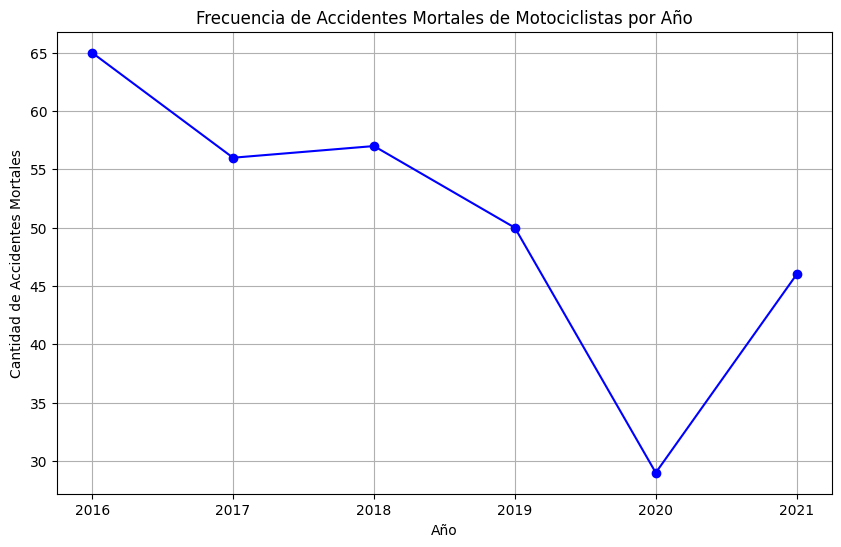

In [63]:

# Filtrar los datos para motociclistas y accidentes mortales
df_motociclistas = df_victimas[(df_victimas['VICTIMA'] == 'MOTO') & (df_victimas['FECHA_FALLECIMIENTO'] != 'SD')].copy()

# Usar la columna AAAA que ya contiene los datos del año
df_motociclistas.loc[:, 'Año'] = df_motociclistas['AAAA']

# Contar la cantidad de accidentes mortales por año
accidentes_por_año = df_motociclistas['Año'].value_counts().sort_index()

# Crear el gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(accidentes_por_año.index, accidentes_por_año.values, marker='o', linestyle='-', color='b')
plt.title('Frecuencia de Accidentes Mortales de Motociclistas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes Mortales')
plt.grid(True)
plt.show()

El gráfico anterior muestra la cantidad de accidentes fatales, específicamente aquellos en los que las personas fallecidas eran conductores o pasajeros de una motocicleta. Podemos observar una tendencia decreciente en la cantidad de decesos por este motivo desde 2016. Sin embargo, durante el año 2021, se registró un notable aumento en los fallecimientos relacionados con accidentes de motocicleta, con un incremento aproximado del 58% respecto al año anterior. Esta fluctuación resalta la importancia de continuar implementando y mejorando las medidas de seguridad vial para reducir la mortalidad en accidentes de motocicleta.

In [64]:
# Filtrar los datos para motociclistas y accidentes mortales
df_motociclistas = df_victimas[(df_victimas['VICTIMA'] == 'MOTO') & (df_victimas['FECHA_FALLECIMIENTO'] != 'SD')].copy()
df_motociclistas['Año'] = df_motociclistas['AAAA']

# Contar la cantidad de accidentes mortales por año
accidentes_por_año = df_motociclistas['Año'].value_counts().sort_index()

# Mostrar los datos exactos de los accidentes por año
print("Accidentes Mortales de Motociclistas por Año:")
print(accidentes_por_año)

Accidentes Mortales de Motociclistas por Año:
Año
2016    65
2017    56
2018    57
2019    50
2020    29
2021    46
Name: count, dtype: int64


In [99]:
accidentes_por_año.to_excel('motociclistas.xlsx')

<span style="font-weight:bold; font-size: 25px;">Grafico Cantidad de segun el sexo</span>

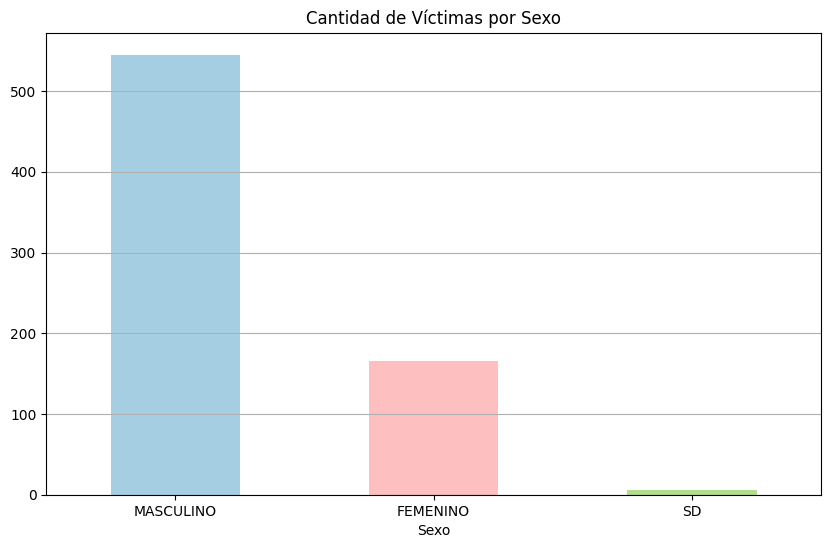

In [65]:
df_victimas['SEXO'] = df_victimas['SEXO'].fillna('SD')
sexo_counts = df_victimas['SEXO'].value_counts()


plt.figure(figsize=(10, 6))
colors = ['#A6CEE3', '#FDBFBF', '#B2DF8A']
sexo_counts.plot(kind='bar', color=colors)
plt.title('Cantidad de Víctimas por Sexo')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Podemos observar en el gráfico anterior que existe una diferencia significativa en la cantidad de hombres y mujeres que fallecen debido a accidentes viales. La cantidad de hombres que pierden la vida en estos incidentes es considerablemente mayor en comparación con las mujeres. Este dato revela una preocupante disparidad de género en las estadísticas de mortalidad por accidentes viales, lo que podría estar relacionado con diversos factores como los comportamientos de conducción, la exposición al riesgo y otros elementos socioculturales.

In [66]:
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'], errors='coerce')
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')


<div style="font-weight:bold;  font-size: 25px;">Grafico Tiempo transcurrido entre el Accidente y el Desceso</div>


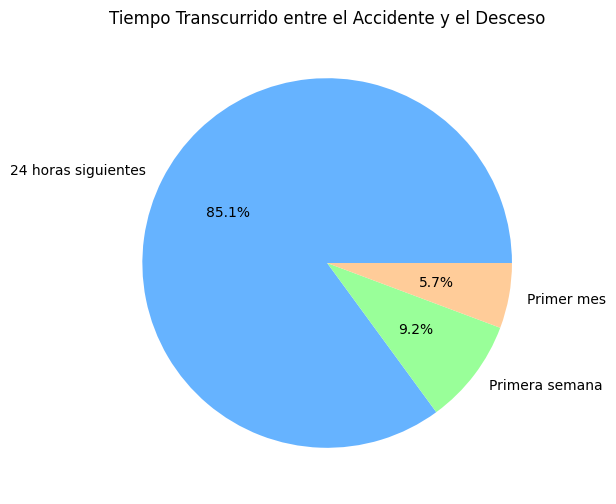

In [67]:

# Calcular la diferencia en días entre FECHA y FECHA_FALLECIMIENTO
df_victimas['Diferencia_Dias'] = (df_victimas['FECHA_FALLECIMIENTO'] - df_victimas['FECHA']).dt.days

# Definir categorías según el tiempo transcurrido
bins = [-1, 1, 7, 30]
labels = ['24 horas siguientes', 'Primera semana', 'Primer mes']
df_victimas['Categoria_Tiempo'] = pd.cut(df_victimas['Diferencia_Dias'], bins=bins, labels=labels)

# Contar la cantidad de registros por categoría
categoria_counts = df_victimas['Categoria_Tiempo'].value_counts().sort_index()

# Crear el gráfico de tipo torta
plt.figure(figsize=(6, 6))
categoria_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Tiempo Transcurrido entre el Accidente y el Desceso')
plt.ylabel('')
plt.show()

El gráfico anterior muestra una enorme diferencia entre las víctimas de accidentes que fallecen el mismo día del accidente y aquellas que fallecen posteriormente. Más del 85% de las víctimas fallecen el mismo día del accidente. Después del primer día, solo un 9.2% de las víctimas fallecen durante la primera semana. Finalmente, solo un 5.7% fallecen entre la primera semana y los 30 días posteriores al accidente.

Este análisis resalta la gravedad de los accidentes viales y la importancia de la atención inmediata. La alta tasa de mortalidad el mismo día subraya la necesidad de mejorar las respuestas de emergencia y las medidas preventivas para reducir la mortalidad en el lugar del accidente.

In [70]:
df_victimas.to_excel('victimas.xlsx')

In [94]:
df_victimas.head(10)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,Rango_Etario,Diferencia_Dias,Categoria_Tiempo
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01,19-30,0.0,24 horas siguientes
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02,71+,0.0,24 horas siguientes
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03,31-50,0.0,24 horas siguientes
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,NaT,19-30,NaN,NaN
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01,19-30,11.0,Primer mes
5,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-24,31-50,0.0,24 horas siguientes
6,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29.0,2016-01-26,19-30,2.0,Primera semana
7,2016-0010,2016-01-29,2016,1,29,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-29,19-30,0.0,24 horas siguientes
8,2016-0012,2016-02-08,2016,2,8,CONDUCTOR,MOTO,MASCULINO,22.0,2016-02-08,19-30,0.0,24 horas siguientes
9,2016-0013,2016-02-10,2016,2,10,PEATON,PEATON,MASCULINO,16.0,2016-02-10,0-18,0.0,24 horas siguientes
